Getting dataset from Kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:06<00:00, 190MB/s]
100% 1.06G/1.06G [00:06<00:00, 166MB/s]


In [4]:
import zipfile
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# generators - easier way to load large datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="/content/train",
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.


In [7]:
# generators
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
)

Found 5000 files belonging to 2 classes.


In [8]:
# normalize by dividing by 255
def process(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

In [9]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

<h1>Creating CNN Model</h1>

In [19]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu',kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Flatten(),

    # fully connected layers
    Dense(128,activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    Dense(64,activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    Dense(1,activation='sigmoid')
])

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [27]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [33]:
optimizer = Adam(learning_rate=0.0005)  # Set your desired learning rate
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=["accuracy"])

In [34]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds,callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 82ms/step - accuracy: 0.9016 - loss: 0.4371 - val_accuracy: 0.9008 - val_loss: 0.4208
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.9209 - loss: 0.3778 - val_accuracy: 0.8984 - val_loss: 0.4408
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9288 - loss: 0.3627 - val_accuracy: 0.8428 - val_loss: 0.5802
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9341 - loss: 0.3577 - val_accuracy: 0.8864 - val_loss: 0.4690


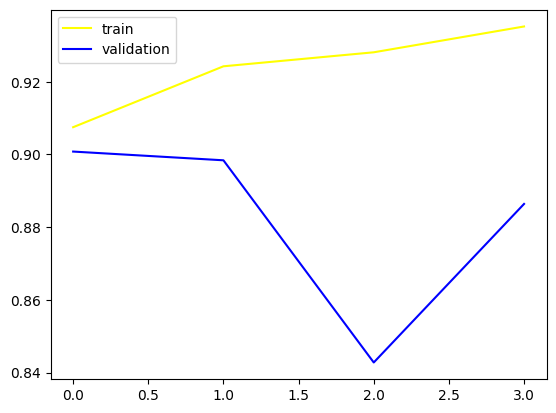

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='yellow',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

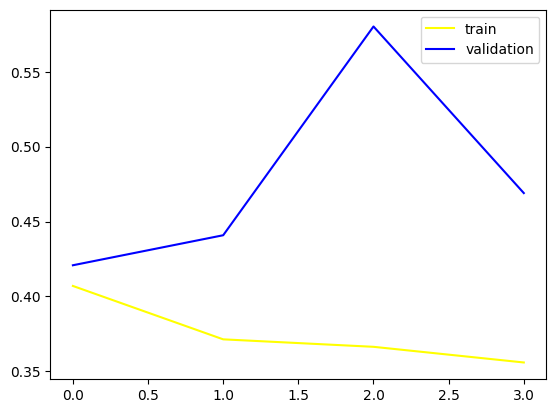

In [36]:
plt.plot(history.history['loss'],color='yellow',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


<h1>ways to reduce overfitting</h1>

- add more data
- data augmentation
- L1/L2 Regularizer
- Dropout
- Batch Norm
- Reduce complexity

In [40]:
loss, accuracy = model.evaluate(validation_ds)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9009 - loss: 0.4227
Validation Loss: 0.4208011329174042
Validation Accuracy: 0.9007999897003174


In [42]:
loss, accuracy = model.evaluate(train_ds)
print('Training Loss:', loss)
print('Training Accuracy:', accuracy)

625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.9288 - loss: 0.3514
Training Loss: 0.32759061455726624
Training Accuracy: 0.9429500102996826


In [ ]:
# making a prediction

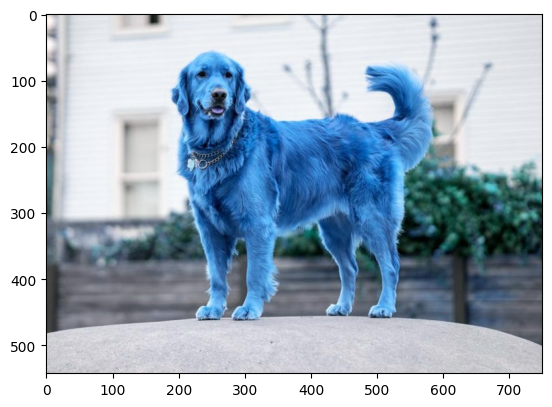

In [83]:
import cv2
test_img = cv2.imread('/content/prediction_dog.jpeg')
plt.imshow(test_img)
plt.show()

In [84]:
test_img.shape

(543, 750, 3)

In [85]:
test_img = cv2.resize(test_img,(256,256))

In [86]:
test_input = test_img.reshape((1,256,256,3))

In [87]:
if model.predict(test_input) > 0.5:
  print("DOG")
else:
  print("CAT")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
DOG


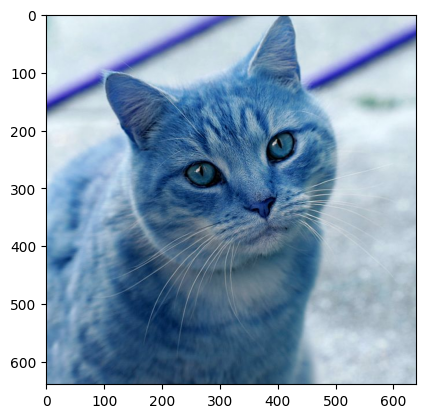

In [88]:
test_img_1 = cv2.imread('/content/prediction_cat.jpg')
plt.imshow(test_img_1)
plt.show()

In [89]:
test_img_1.shape

(639, 640, 3)

In [90]:
test_img_1 = cv2.resize(test_img_1,(256,256))
test_input_1 = test_img_1.reshape((1,256,256,3))

In [91]:
if model.predict(test_input_1) < 0.5:
  print("DOG")
else:
  print("CAT")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
CAT
